# PROJECT: "TMDb movies"
## TABLE OF CONTENTS
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## INTRODUCTION

> This project is an Exploratory Data Analysis conducted on the TMDb dataset that contains over 10 000 of movies. The TMDb dataset is quite diverse and gives a possibility to analyze it from different perspectives. This particular analysis aims to investigate the following:
>
> **General overview of film industry**
1. What is the trend of movies' popularity?
2. What is the trend of the number of movies released over the years?
3. What are the most shot genres?
>
> **What is more important for obtaining a high profit from the movie, popularity score or rating?**
1. Do movies with higher popularity scores receive higher profits?
2. Do the highly rated movies receive higher profits?
>
> **What factors affect the popularity scores of the movies?**
1. Budget and popularity score
2. Runtime and popularity score

In [1]:
# the following packages will be used in the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## DATA WRANGLING

### *General Properties*

In [2]:
# loading data and displaying a few lines
df = pd.read_csv(r"D:\2018_TIME_TO_CHANGE\UDACITY\PART 2 (Introduction to Data Analysis)\PROJECT\tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#general inspection of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The movie dataset has 10866 entries and 21 columns but several of the columns have missing data.
The following columns have missing values: "imdb_id", "cast", "homepage", "director", "tagline", "keywords", "overview", "genres", "production companies".

### *Data Cleaning*

#### Remove columns

Some of the columns are not essential and will not be used in the analysis, so we can remove them. <br>In order to conduct our analysis, we need budgets and revenues, but it will be useful to keep only adjusted values as in terms of economics it makes more sense for comparability.

In [4]:
# delete several columns
to_drop = ["id", "imdb_id", "cast", "homepage", "tagline", "keywords", "overview", "production_companies", "release_date", "budget", "revenue"]
df.drop(to_drop, axis = 1, inplace = True)
df.head(2)

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


To simplify a bit our further code, we will rename budget_adj to "budget" and revenue_adj to "revenue".

#### Rename columns

In [5]:
# rename columns budget_adj and revenue_adj
df = df.rename(columns = {"budget_adj" : "budget"})
df = df.rename(columns = {"revenue_adj" : "revenue"})
df.head(2)

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


#### Remove duplicated data

In [6]:
# check for duplicates
df.duplicated().sum()
# there is only one duplicated entry

1

In [7]:
# remove duplicates
df.drop_duplicates(inplace = True)

In [8]:
# double check
df.duplicated().sum()
# Duplicated data was successfully removed

0

#### Remove null values

In [9]:
# check if any columns have null values
df.isnull().sum()

popularity         0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget             0
revenue            0
dtype: int64

In [10]:
# remove null values
df.dropna(inplace = True)

In [11]:
# double check
df.isnull().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

In [12]:
# Inspect data that all our changes took place
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget            10800 non-null float64
revenue           10800 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 928.1+ KB


We also have to check for zero values in particular columns, namely zero values in "budget", "revenue" and "runtime" as it might affect our findings. <br>

#### Zero values in budget, revenue, runtime

In [13]:
# filter dataframe where budget equals to 0
df.query("budget == 0").count()

popularity        5636
original_title    5636
director          5636
runtime           5636
genres            5636
vote_count        5636
vote_average      5636
release_year      5636
budget            5636
revenue           5636
dtype: int64

In [14]:
# filter dataframe where revenue equals to 0
df.query("revenue == 0").count()

popularity        5952
original_title    5952
director          5952
runtime           5952
genres            5952
vote_count        5952
vote_average      5952
release_year      5952
budget            5952
revenue           5952
dtype: int64

In [15]:
# filter dataframe where runtime equals to 0
df.query("runtime == 0").count()

popularity        28
original_title    28
director          28
runtime           28
genres            28
vote_count        28
vote_average      28
release_year      28
budget            28
revenue           28
dtype: int64

There are a lot of 0 values in the budget and revenue columns but just a few in runtime. So, in order to conduct our analysis more efficiently, we will be using two data frames.
<br>
The first one is "df" with 10 800 entries will be used for the first section of our report as these columns with zero values will not influence our findings.
<br>The second one with no zero values, called "df2" wil be used for sections 2 and 3 ("What is more important for obtaining a high profit from the movie, popularity score or rating?" and "What factors affect the popularity scores of the movies?").
<br>


In [16]:
# create a copy of df data frame
df2 = df.copy()
# check if the copy was made successfully
df2.head(2)

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [17]:
# replace 0 values to null values
check_list = ["budget", "revenue", "runtime"]
df2[check_list] = df2[check_list].replace(0, np.NAN)

# drop null values
df2 = df2.dropna(subset = check_list)

In [18]:
# check that all changes took place
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null float64
genres            3853 non-null object
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
budget            3853 non-null float64
revenue           3853 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 331.1+ KB


The next step is to convert infinite float values of budget and revenue columns to integer values. We have float values because these are our adjusted to inflation values.

#### Change datatypes of revenue and budget columns

In [19]:
check = ["budget", "revenue"]
# first of all, we have to round those infinite numbers
df2[check] = df2[check].round(0)

# converting rounded values to integers
df2[check] = df2[check].astype(int)

In [20]:
# final check that all changes took place
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null float64
genres            3853 non-null object
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
budget            3853 non-null int32
revenue           3853 non-null int32
dtypes: float64(3), int32(2), int64(2), object(3)
memory usage: 301.0+ KB


Finally, our two data frames are ready for analysis.

<a id='eda'></a>
## EXPLORATORY DATA ANALYSIS

## General overview of the film industry

### What is the trend of movies' popularity?

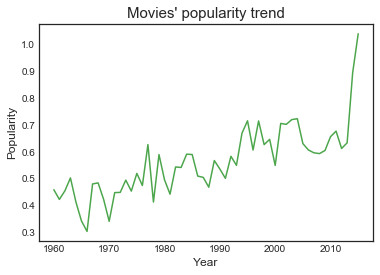

In [21]:
# calculate mean popularity score for each year in order to observe a trend over the time
mean = df.groupby("release_year")["popularity"].mean()
# plot our findings
sns.set_style('white')
mean.plot(kind = "line", alpha = 0.7, label = "mean", color = "g")
plt.title("Movies' popularity trend", fontsize = 15)
plt.xlabel("Year", fontsize = 12);
plt.ylabel("Popularity", fontsize = 12);

So, we can observe the steady but significant rise in average popularity over the years. This trend is reasonable because of the development of the industry and simplified access to the movies nowadays comparing to access in the 1960s. <br>

Let's investigate a trend of the number of movies released from year to year.

### What is the trend of the number of movies released over the years?

In [22]:
# grouping by release_year
number_of_movies = df.groupby("release_year")["original_title"].count()
number_of_movies.head(2)

release_year
1960    32
1961    31
Name: original_title, dtype: int64

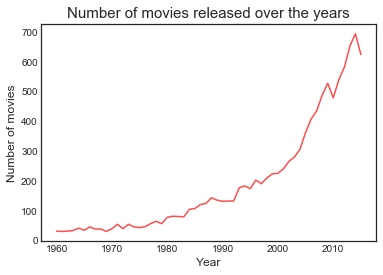

In [23]:
# plot our findings
number_of_movies.plot(kind = "line", alpha = 0.7, color = "r")
sns.set_style('white')
plt.title("Number of movies released over the years", fontsize = 15)
plt.xlabel("Year", fontsize = 12);
plt.ylabel("Number of movies", fontsize = 12);

The chart above clearly shows that the number of movies released is significantly rising over the years.

### What are the most shot genres?

In [24]:
# create a list of all genres with repetative values
output = []

for word in df["genres"]:
    if isinstance(word, str):     # because once received an error that we have a float not a string value
        genres = word.split("|")
    for genre in genres:
            output.append(genre)

In [25]:
# check how many of values we have (in our dataset we have 10800 movies and several genres can be assigned to each movie)
len(output)

26864

In [26]:
# convert the list to dataframe
df_list = pd.DataFrame({'genres':output})

In [27]:
df_list.head(2)

,genres
0,Action
1,Adventure


In [28]:
# create a variable with our values
bars = df_list["genres"].value_counts()

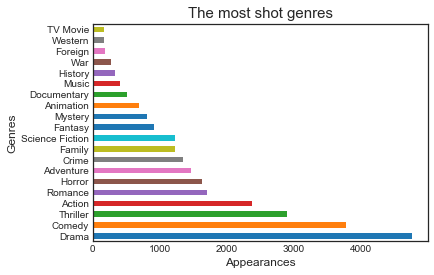

In [29]:
# create a bar chart
bars.plot(kind = "barh");
plt.title("The most shot genres", fontsize = 15)
plt.ylabel("Genres", fontsize = 12)
plt.xlabel("Appearances", fontsize = 12);

As it can be seen from the chart above, the most shot genre is drama. The second place took "Comedy" genre and "Thriller" closes the final trinity.

## What is more important for obtaining a high profit from the movie, popularity score or rating?

### Do movies with higher popularity scores receive higher profits?

First of all, we have to add a new column with profits.

In [30]:
# create a variable profit
profit = df2.revenue - df2.budget

# add a new column
df2["profit"] = profit

In [31]:
# check if the new column was created
df2.head(2)

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget,revenue,profit
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445893,1254445954
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292,210161353


In [32]:
# find a median popularity
df2.popularity.median()

0.797723

In [33]:
# select samples with popularity less than the median
low_popularity = df2.query("popularity < 0.797723")

# select samples with popularity greater than or equal to the median
high_popularity = df2.query("popularity >= 0.797723")

# ensure these queries included each sample exactly once
num_samples = df2.shape[0]
num_samples == low_popularity['profit'].count() + high_popularity['profit'].count() 

True

In [34]:
# get mean revenue for the low popularity and high popularity groups
low_popularity["profit"].mean(), high_popularity["profit"].mean()

(26220750.66770509, 158556138.08925793)

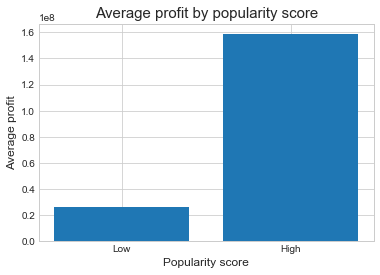

In [35]:
# plot our findings
sns.set_style('whitegrid')
locations = [1,2]
heights = [low_popularity["profit"].mean(), high_popularity["profit"].mean()]
labels = ["Low", "High"]
plt.bar(locations, heights, tick_label = labels)
plt.title("Average profit by popularity score", fontsize = 15)
plt.xlabel("Popularity score", fontsize = 12)
plt.ylabel("Average profit", fontsize = 12);

As it can be seen from the chart above, movies with higher popularity scores tend to receive on average six times higher profits.
Let's investigate wether the rating (vote_average) has the same relationship.

### Do the highly rated movies receive higher profits?

To give an answer to this question, the same technique will be used but in the form of formula.

In [36]:
def chart_more_less(dataframe, col_by, col_mean):
    #calculate a median
    median = dataframe[col_by].median()
    # select samples(data frames) with lower and higher values of col_by than the median
    low_value_df = dataframe[dataframe[col_by] < median]
    high_value_df = dataframe[dataframe[col_by] >= median]
    # print average col_mean for low and high values of col_by groups
    print(low_value_df[col_mean].mean(), high_value_df[col_mean].mean())
    #create a plot
    sns.set_style('whitegrid')
    locations = [1,2]
    heights = [low_value_df[col_mean].mean(), high_value_df[col_mean].mean()]
    labels = ["Low", "High"]
    plt.bar(locations, heights, tick_label = labels)
    plt.title("Average profit by rating score", fontsize = 15)
    plt.xlabel("Rating score", fontsize = 12)
    plt.ylabel("Average profit", fontsize = 12);

49916521.9326453 131283562.13021868


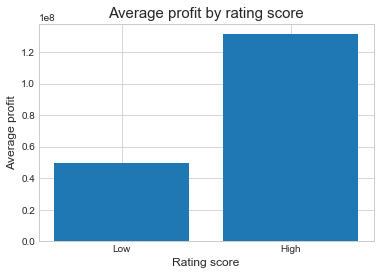

In [37]:
chart_more_less(df2, "vote_average", "profit")

The results are surprising. The movie with a high rating on average receives 2.6 times higher profits than the movie with a low rating.
<br>
<br>Therefore, we can make a conclusion that the popularity score affects potential profits with a higher degree than the rating. Basically, if the movie got not the best ratings but is popular and so-called on the "hype", this movie has great chances to receive a good profit.
<br>
Also, it gives us a hint that the proper marketing of the movie should be one of the most important pillars of the success.

In [38]:
# correlation coefficients also prove our findings
np.corrcoef(df2.popularity, df2.profit), np.corrcoef(df2.vote_average, df2.profit)

(array([[1.        , 0.51780368],
        [0.51780368, 1.        ]]), array([[1.        , 0.29253424],
        [0.29253424, 1.        ]]))

As we know that popularity score affects profit from the movie, let's investigate what factors affect the popularity scores of the movies

### WHAT FACTORS AFFECT THE POPULARITY SCORES OF THE MOVIES?

### Budget and popularity score

Let's define a function that will help us to cut any data series into some parts/levels and create a corresponding column. <br>

In [39]:
# check the edge numbers
df2.budget.describe()

count    3.853000e+03
mean     4.425038e+07
std      4.481043e+07
min      1.000000e+00
25%      1.309053e+07
50%      3.001664e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget, dtype: float64

In [47]:
# define a function
def create_levels(dataframe, column):
    min_value = dataframe[column].describe()[3]
    value_25 = dataframe[column].describe()[4]
    value_50 = dataframe[column].describe()[5]
    value_75 = dataframe[column].describe()[6]
    max_value = dataframe[column].describe()[7]
    # define edges numbers and names
    bin_edges = [min_value, value_25, value_50, value_75, max_value]
    bin_names = ["Low", "Medium", "Moderately high", "High"]
    # adding new column
    new_column = "{}_levels".format(column)
    dataframe[new_column] = pd.cut(dataframe[column], bin_edges, labels = bin_names)
    return dataframe

In [41]:
#execute our function
create_levels(df2, "budget")
df2.head(2)

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget,revenue,profit,budget_levels
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445893,1254445954,High
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292,210161353,High


In [42]:
# grouping by budget levels
df2.groupby("budget_levels", as_index = False)["popularity"].mean()

,budget_levels,popularity
0,Low,0.711841
1,Medium,0.930196
2,Moderately high,1.160838
3,High,1.965994


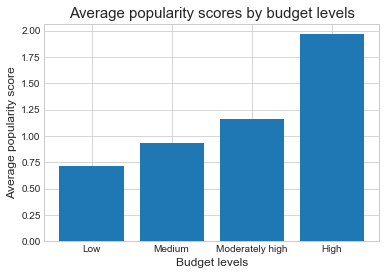

In [43]:
# creating a bar chart
locations = [1,2,3,4]
heights = df2.groupby("budget_levels")["popularity"].mean()
labels = ["Low", "Medium", "Moderately high", "High"]
plt.bar(labels, heights, tick_label = labels);
plt.title("Average popularity scores by budget levels", fontsize = 15)
plt.xlabel("Budget levels", fontsize = 12)
plt.ylabel("Average popularity score", fontsize = 12);

The chart above shows that movies on average receive higher popularity scores with increasing the budgets. This outcome is reasonable due to the fact that budget always includes costs for marketing and promotion which positively affect popularity scores.

### Runtime and popularity score

In [44]:
df2.runtime.describe()

count    3853.000000
mean      109.208928
std        19.912913
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Let's create several runtime levels.

In [45]:
# executing our function
create_levels(df2, "runtime").head(2)

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget,revenue,profit,budget_levels,runtime_levels
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445893,1254445954,High,High
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292,210161353,High,High


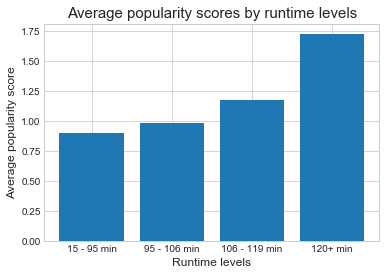

In [46]:
# creating bar chart
locations = [1,2,3,4]
heights = df2.groupby("runtime_levels")["popularity"].mean()
labels = ["15 - 95 min", "95 - 106 min", "106 - 119 min", "120+ min"]
plt.bar(labels, heights, tick_label = labels);
plt.title("Average popularity scores by runtime levels", fontsize = 15)
plt.xlabel("Runtime levels", fontsize = 12)
plt.ylabel("Average popularity score", fontsize = 12);

So, we investigated that movies on average receive higher popularity scores with increasing the length of the movie.

<a id='conclusions'></a>
## CONCLUSIONS

>The general overview of the industry revealed several trends. There is a constant growth of the movies' popularity. This is the sign that the film industry is developing and growing, and people have more access to those movies. As an evidence of that, the number of movies released is significantly increased over the years. Also, most of the movies released can be assigned to "Drama" genre, the second place took "Comedy" genre and "Thriller" closes the final trinity.
>
> This particular analysis investigated that popularity score has a bigger impact on the profits from the movies rather than rating score. It means that if the movie was not highly rated but is popular, this movie still can bring a good profit. So, the popularity score is important in order to treat a certain movie successful from an economics perspective. Therefore, the next step was to define variables which might affect popularity scores of the movies.
>
> The analysis reveals that movies with higher budgets on average receive higher popularity scores. The analogical relationship is between runtime and popularity scores. The movies on average receive higher popularity scores with increasing the length of the movie.